<a href="https://colab.research.google.com/github/aadyakoirala/analytics-projects/blob/main/TelCoChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and Prepare data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [ ]:
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

Cloning into 'MSDIA_PredictiveModelingAndMachineLearning'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 367 (delta 71), reused 15 (delta 15), pack-reused 253 (from 2)
Receiving objects: 100% (367/367), 49.94 MiB | 14.73 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
TelCoChurn = pd.read_csv('MSDIA_PredictiveModelingAndMachineLearning/GB886_IV_15_TelCoChurn.csv')

In [ ]:
TelCoChurn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
TelCoChurn.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
TelCoChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

TelCoChurn = pd.get_dummies(TelCoChurn, columns=categorical_cols, drop_first=True)

In [ ]:
TelCoChurn['TotalCharges'] = pd.to_numeric(TelCoChurn['TotalCharges'], errors='coerce')
TelCoChurn.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
print(TelCoChurn['TotalCharges'].dtype)  # Should show float64

float64


In [ ]:
# Convert 'Churn' to binary
TelCoChurn['Churn'] =TelCoChurn['Churn'].map({'Yes': 1, 'No': 0})


Let's check a correlation plot to make sure none of the variables is extremely correlated:

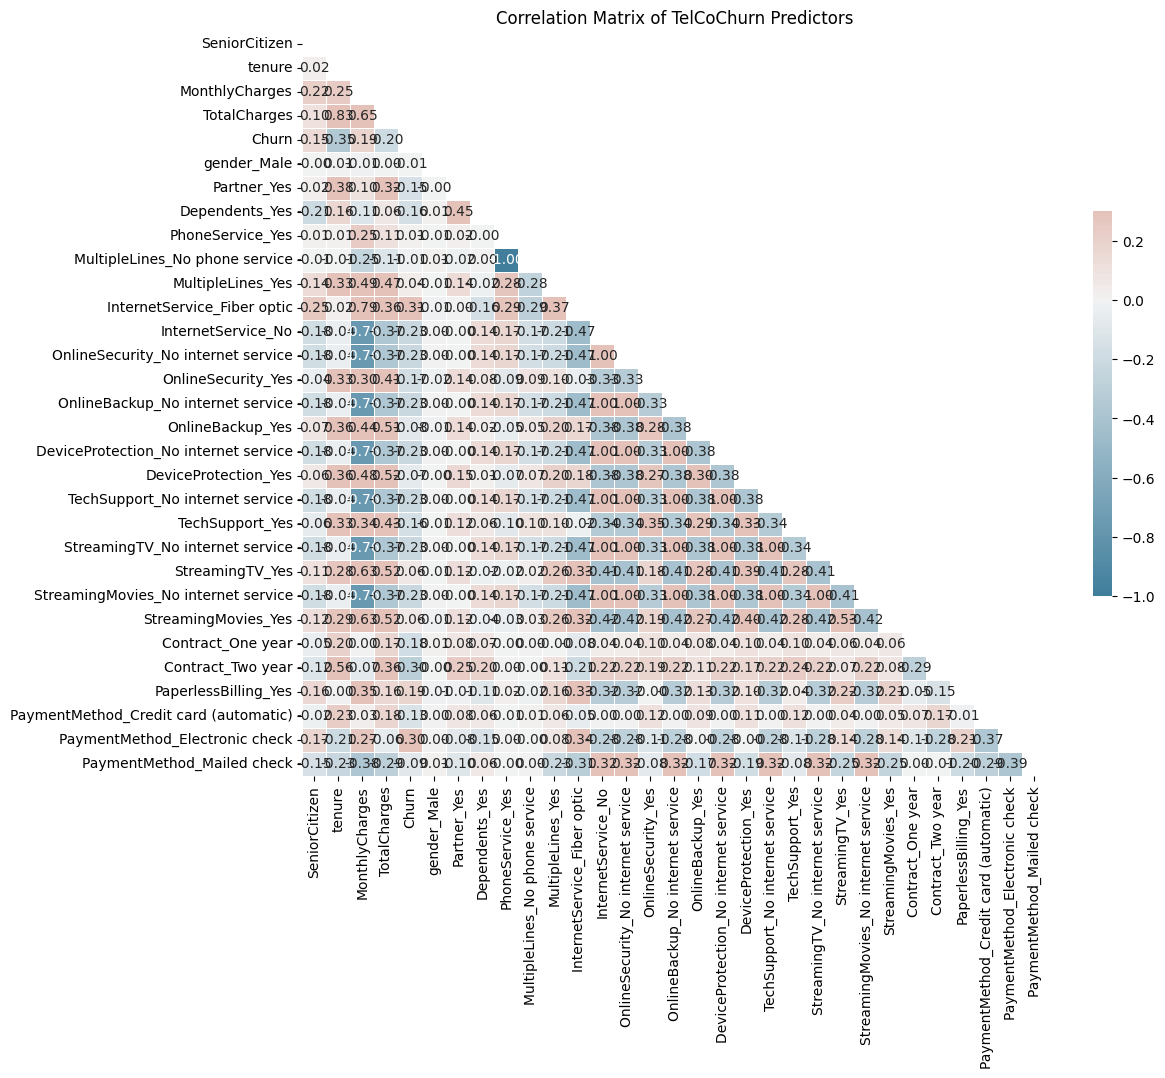

In [ ]:
# Insert correlation plot here

# 1. Compute correlation matrix for numeric predictors
corr = TelCoChurn.corr()

# 2. Create upper triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# 3. Define diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 4. Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of TelCoChurn Predictors")
plt.show()

In [ ]:
# 1. Compute correlation matrix
corr_matrix = TelCoChurn.corr().abs()

# 2. Unstack the matrix into pairs
corr_pairs = corr_matrix.unstack()

# 3. Drop self-correlations (correlation of a variable with itself)
filtered_pairs = corr_pairs[corr_pairs < 1.0]

# 4. Sort by correlation strength (descending)
sorted_pairs = filtered_pairs.sort_values(ascending=False)

# 5. Display top N most correlated pairs
print(sorted_pairs.head(10))

tenure                                TotalCharges                          0.825880
TotalCharges                          tenure                                0.825880
InternetService_Fiber optic           MonthlyCharges                        0.787195
MonthlyCharges                        InternetService_Fiber optic           0.787195
DeviceProtection_No internet service  MonthlyCharges                        0.763191
TechSupport_No internet service       MonthlyCharges                        0.763191
OnlineBackup_No internet service      MonthlyCharges                        0.763191
MonthlyCharges                        OnlineBackup_No internet service      0.763191
                                      OnlineSecurity_No internet service    0.763191
OnlineSecurity_No internet service    MonthlyCharges                        0.763191
dtype: float64


## Multicollinearity Check Summary
I conducted a correlation audit after one-hot encoding categorical variables. The highest correlation observed was between tenure and TotalCharges (0.826), which reflects a natural business relationship. Other moderately correlated pairs (e.g., InternetService_Fiber optic and MonthlyCharges) were below the critical threshold of 0.85 and are structurally meaningful. No variable pairs exceeded 0.90, and no perfect correlations were found. Therefore, I retained all predictors for modeling, with no evidence of problematic multicollinearity.

##

##Predictive Modeling: Logistic Regression
Since the target variable ‘Churn’ is binary (e.g., churn vs. no churn), I selected logistic regression as the appropriate classification model. Logistic regression is designed to estimate the probability of class membership, making it ideal for predicting whether a customer will churn.


In [ ]:
# 4. Define X and y
y = TelCoChurn['Churn']
X = TelCoChurn.drop(columns='Churn')

# 5. Add constant and coerce to float
X = sm.add_constant(X).astype(float)

# 6. Fit logistic regression model
logistic_mod = sm.Logit(y, X)
result = logistic_mod.fit(maxiter=10000)

# 7. View summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.2845
Time:                        17:38:51   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8340      

## Interpretation of Logistic Regression Results

The logistic regression model identifies several meaningful predictors of customer churn. Notably, tenure and contract type show strong negative associations with churn — customers who have been with the company longer or are on one- or two-year contracts are significantly less likely to churn. This aligns with expectations, as longer relationships and contractual commitments typically reduce churn risk.
Conversely, features such as InternetService_Fiber optic, StreamingTV_Yes, and StreamingMovies_Yes exhibit strong positive associations with churn. These may reflect higher service expectations or cost sensitivity among customers using premium services. Additionally, PaperlessBilling_Yes and PaymentMethod_Electronic check are positively associated with churn, suggesting that billing preferences and payment friction may influence retention.
Demographic variables also play a role. For example, SeniorCitizen status is positively associated with churn, while Dependents_Yes shows a marginally negative association. Interestingly, MonthlyCharges has a negative coefficient, but its standard error is undefined (nan), indicating potential multicollinearity or estimation issues.
Several service-related features — such as TechSupport_Yes, OnlineSecurity_Yes, and DeviceProtection_Yes — show negative associations with churn, though not all are statistically significant. These suggest that bundled support services may help retain customers, but their impact varies.
Overall, the model converged successfully and is statistically significant (LLR p-value < 0.001), with a Pseudo R-squared of 0.2845, indicating a moderate fit typical for behavioral churn models.



## Predict Churn Probabilities

In [ ]:
# Predict churn probabilities (values between 0 and 1)
y_pred_proba = result.predict(X)

##Let's take a look at the confusion table:



In [ ]:

# 1. Predict churn probabilities
y_pred_proba = result.predict(X)

# 2. Convert to binary predictions (threshold = 0.5)
y_hat = (y_pred_proba >= 0.5).astype(int)

# 3. Create confusion table
conf_mat = pd.crosstab(y, y_hat, rownames=['Actual Churn'], colnames=['Predicted Churn'])

# 4. Add row and column totals
conf_mat.loc['Column_Total'] = conf_mat.sum(numeric_only=True, axis=0)
conf_mat['Row_Total'] = conf_mat.sum(numeric_only=True, axis=1)

# 5. Display
print(conf_mat)

Predicted Churn     0     1  Row_Total
Actual Churn                          
0                4639   524       5163
1                 833  1036       1869
Column_Total     5472  1560       7032


## And let's calculate some resulting metrics:

In [ ]:
# Confusion matrix values
TP = 1036
TN = 4639
FP = 524
FN = 833
Total = 7032

# Metrics
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate
MCR = (FP + FN) / Total  # Misclassification Rate

# Print results
print("TPR =", round(TPR, 4))  # ~0.5544
print("TNR =", round(TNR, 4))  # ~0.8984
print("MCR =", round(MCR, 4))  # ~0.1927

TPR = 0.5543
TNR = 0.8985
MCR = 0.193


##So we are missing a few, yet the misclassification rate seems reasonable.

Let's consider the ROC curve:

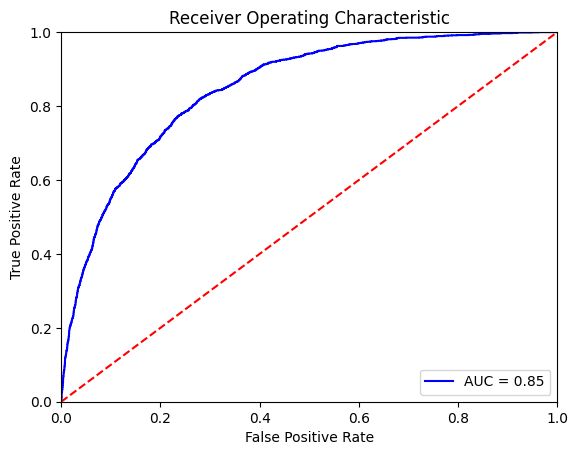

In [ ]:

p_x = result.predict(X)
fpr, tpr, threshold = roc_curve(y, p_x)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 ## Interpretation
 - Pseudo R-squared = 0.2845
This means the model explains approximately 28.45% of the variation in churn behavior. While lower than traditional R-squared in linear regression, this is quite strong for classification problems involving human behavior, where noise and unobserved factors are common.
- AUC = 0.85
This indicates very good discriminatory power — the model can correctly rank churners above non-churners 85% of the time. It’s well above the baseline of 0.5 and comfortably in the “very good” range.



##Model Validation

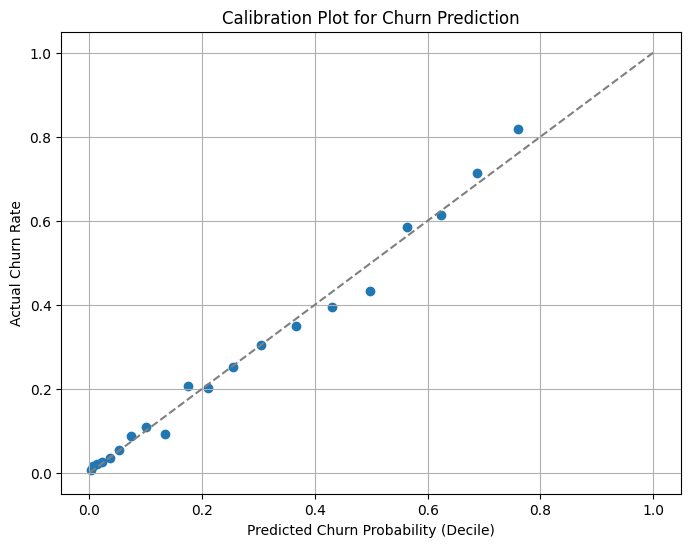

In [ ]:
# Predict churn probabilities
TelCoChurn['P_churn'] = result.predict(sm.add_constant(X))

# Create deciles based on predicted probabilities
TelCoChurn['decile'] = pd.qcut(TelCoChurn['P_churn'], 20, labels=False)

# Calculate average predicted probability and actual churn rate per decile
decile_stats = TelCoChurn.groupby('decile').agg({
    'P_churn': 'mean',
    'Churn': 'mean'  # Replace 'Churn' with your actual target column name if different
})

# Plot calibration curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(decile_stats['P_churn'], decile_stats['Churn'])
plt.xlabel('Predicted Churn Probability (Decile)')
plt.ylabel('Actual Churn Rate')
plt.title('Calibration Plot for Churn Prediction')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
plt.grid(True)
plt.show()

So the points do not lie on the line and there appear to be systematic deviations....

Cutoff Threshold Discussion
A 50% cutoff is standard for general churn prediction, where customers with predicted churn probability above 0.5 are flagged for retention efforts.

In high-value customer retention, lowering the cutoff to 0.4 helps catch more potential churners. This increases recall and ensures that fewer valuable customers are missed, even if it means more false positives.

Conversely, increasing the cutoff to 0.6 may be appropriate in cost-sensitive settings, where outreach resources are limited. This reduces unnecessary retention efforts by focusing only on customers most likely to churn.

In my model, most predicted probabilities fall below 0.4, with fewer above 0.6. This suggests that a lower cutoff may be more effective for identifying at-risk customers early, especially if the business prioritizes retention over cost control.


Let's evaluate a chi-squared statistic and p value

In [ ]:
from scipy.stats import chi2
# 1. Predict churn probabilities
TelCoChurn['P_churn'] = result.predict(sm.add_constant(X))

# 2. Create deciles
TelCoChurn['decile'] = pd.qcut(TelCoChurn['P_churn'], 20, labels=False)

# 3. Calculate observed and expected churn counts per decile
observed = TelCoChurn.groupby('decile')['Churn'].sum()       # Replace 'Churn' with your actual target column
expected = TelCoChurn.groupby('decile')['P_churn'].sum()

# 4. Chi-squared statistic
xs_statistic = np.sum((observed - expected)**2 / expected)

# 5. Degrees of freedom
df = 20 - 1

# 6. P-value
p_value = 1 - chi2.cdf(xs_statistic, df)

# 7. Output
print("Chi-squared Statistic:", xs_statistic)
print("P-value:", p_value)

Chi-squared Statistic: 22.059618059748576
P-value: 0.28129920937083597


The p value is >0.05 means differences are small enough to be explained by chance means the model is statically consistent with reality.The chi-squared calibration test does not reject the model, indicating that the predicted churn probabilities are statistically consistent with observed outcomes across deciles. This confirms that the logistic regression model is well-calibrated and valid for business use. Therefore, running a probit regression is not required, as there is no evidence of miscalibration or model failure that would justify testing an alternative link function.